In [1]:
%pylab inline
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import brewer2mpl

Populating the interactive namespace from numpy and matplotlib


In [9]:

# create fROI, extract FIR timeseries, write to dataframe
#!. /home/despoB/kaihwang/bin/TDSigEI/make_indiv_fROI.sh
#!. /home/despoB/kaihwang/bin/TDSigEI/extract_FIR_ts.sh


In [2]:
cd /home/despoB/kaihwang/bin/TDSigEI

/home/despoB/kaihwang/bin/TDSigEI


In [11]:
%run FIR_dataframe.py

ERROR: File `u'FIR_dataframe.py'` not found.


In [6]:
cd /home/despoB/kaihwang/bin/TDSigEI

/home/despoB/kaihwang/bin/TDSigEI


In [5]:
#load dataframe, calculate mean and SEM
FIR_df = pd.read_csv('Data/FIR_df.csv')

mean_df = FIR_df.groupby(['ROI','Condition','Volume']).mean().reset_index()
sem_df = FIR_df.groupby(['ROI','Condition','Volume']).sem().reset_index()


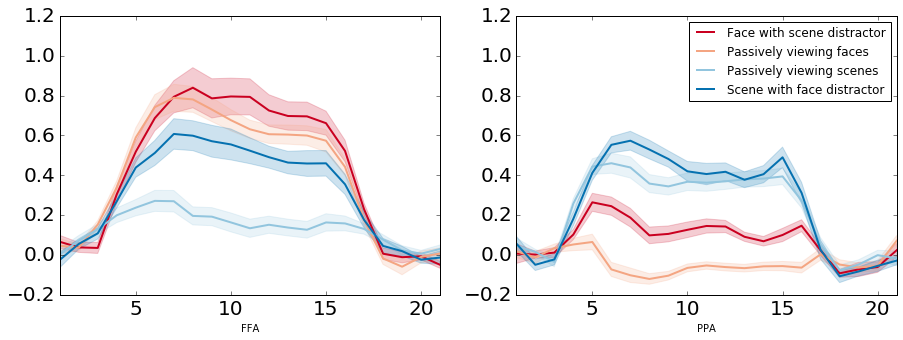

In [19]:
#conditions
plt.rc('xtick', labelsize=20)  
plt.rc('ytick', labelsize=20) 
ROIs = ['FFA', 'PPA']
Conditions =['FH', 'Fp', 'Hp', 'HF']
Labels = ['Face with scene distractor', 'Passively viewing faces ', 'Passively viewing scenes', 'Scene with face distractor']
x = np.arange(1,22)
#get colormap
cmap = brewer2mpl.get_map('RdBu','diverging', 4)
plt.figure(1)
plt.figure(figsize=(15,5))
for r, roi in enumerate(ROIs):
    plt.subplot(1, 2, r+1)
    
    for i, c in enumerate(Conditions):
        y = np.array(mean_df[(mean_df['ROI'] == roi) & (mean_df['Condition'] == c)]['Beta'])
        error = np.array(sem_df[(mean_df['ROI'] == roi) & (mean_df['Condition'] == c)]['Beta'])
        plt.plot(x, y, color = cmap.hex_colors[i], linewidth=2  )
       
        plt.fill_between(x, y-0.75*error, y+0.75*error, alpha=0.2, edgecolor=cmap.hex_colors[i], 
                     facecolor=cmap.hex_colors[i], label=c)

        plt.ylim(-0.2, 1.2)
        plt.xlim(1, 21)
        plt.xlabel(roi)
plt.legend(Labels)
plt.show()


In [35]:
?plt.legend()

In [8]:
r

0